# SqueezeNet on ImageNet

This is SqueezeNet on Imagenet. SGD algorithm.


#### Direct SqeezeNet

    Total params: 1,248,424
    Trainable params: 1,248,424
    Non-trainable params: 0


####  Sqeeze with 50K intrinsic dim

    Total params: 7,589,881
    Trainable params: 50,000
    Non-trainable params: 7,539,881
    
####  Sqeeze with 100K intrinsic dim

    Total params: 7,639,881
    Trainable params: 100,000
    Non-trainable params: 7,539,881

####  Sqeeze with 200K intrinsic dim

    Total params: 7,739,881
    Trainable params: 200,000
    Non-trainable params: 7,539,881

####  Sqeeze with 500K intrinsic dim

    Total params: 8,039,881
    Trainable params: 500,000
    Non-trainable params: 7,539,881


In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

Find the right directory  with

    `ll | grep direct`
    `ll | grep vsize50k`
    `ll | grep vsize100m`
    ...
    
Go to the most recent one, grep validation accuracies with e.g.

     `grep val: 171023_044314_a9c117e_lrb_squz_dist4_direct_cont_3x/diary`
    ...
    
    
Copy the best accuracy numbers (4 of them due to 4-GPU distributed training)

#### Direct

(ml)rosanne@opusgpu168-wbu2 [/mnt/share/public/results/rosanne/171019_sqznet] $ grep val: 171023_044314_a9c117e_lrb_squz_dist4_direct_cont_3x/diary

17.10.23.04.44.13.557   505404 (worker 3) val:   l:  2.0153, l_xe:  2.0153, acc:  0.5481 (0.126s/i)

17.10.23.04.44.14.129   505404 (worker 1) val:   l:  2.0145, l_xe:  2.0145, acc:  0.5510 (0.129s/i)

17.10.23.04.44.14.190   505404 (worker 0) val:   l:  2.0251, l_xe:  2.0251, acc:  0.5469 (0.129s/i)

17.10.23.04.44.14.500   505404 (worker 2) val:   l:  2.0019, l_xe:  2.0019, acc:  0.5504 (0.129s/i)


#### intrinsic 50k

(ml)rosanne@opusgpu168-wbu2 [/mnt/share/public/results/rosanne/171019_sqznet] $ grep val: 171023_151800_a9c117e_lrb_squz_dist4_fastfood_vsize50k_cont2_cont3_cont_cont/diary

17.10.23.15.18.46.406   275220 (worker 3) val:   l:  4.6874, l_xe:  4.6874, acc:  0.1371 (0.0738s/i)

17.10.23.15.18.46.884   275220 (worker 1) val:   l:  4.6705, l_xe:  4.6705, acc:  0.1377 (0.0729s/i)

17.10.23.15.18.53.147   275220 (worker 0) val:   l:  4.6823, l_xe:  4.6823, acc:  0.1373 (0.107s/i)

17.10.23.15.18.53.510   275220 (worker 2) val:   l:  4.6737, l_xe:  4.6737, acc:  0.1387 (0.107s/i)

#### intrinsic 100k

(ml)rosanne@opusgpu168-wbu2 [/mnt/share/public/results/rosanne/171019_sqznet] $ grep val: 171023_152032_a9c117e_lrb_squz_dist4_fastfood_vsize100k_cont_cont_cont2_cont_2x/diary

17.10.23.15.21.41.945   565452 (worker 0) val:   l:  3.9296, l_xe:  3.9296, acc:  0.2381 (0.148s/i)

17.10.23.15.21.42.234   565452 (worker 2) val:   l:  3.9113, l_xe:  3.9113, acc:  0.2385 (0.15s/i)

17.10.23.15.21.42.444   565452 (worker 1) val:   l:  3.9138, l_xe:  3.9138, acc:  0.2397 (0.152s/i)

17.10.23.15.21.42.522   565452 (worker 3) val:   l:  3.9388, l_xe:  3.9388, acc:  0.2377 (0.154s/i)

#### intrinsic 200k

(ml)rosanne@opusgpu168-wbu2 [/mnt/share/public/results/rosanne/171019_sqznet] $ grep val: 171023_152741_a9c117e_lrb_squz_dist4_fastfood_vsize200k_cont_6x/diary

17.10.23.19.00.57.030   680544 (worker 0) val:   l:  3.6063, l_xe:  3.6063, acc:  0.2820 (0.139s/i)

17.10.23.19.00.57.035   680544 (worker 2) val:   l:  3.5659, l_xe:  3.5659, acc:  0.2871 (0.139s/i)

17.10.23.19.00.57.085   680544 (worker 1) val:   l:  3.5694, l_xe:  3.5694, acc:  0.2843 (0.139s/i)

17.10.23.19.00.57.092   680544 (worker 3) val:   l:  3.6047, l_xe:  3.6047, acc:  0.2870 (0.139s/i)


#### intrinsic 500k

(ml)rosanne@opusgpu168-wbu2 [/mnt/share/public/results/rosanne/171019_sqznet] $ grep val: 171023_152544_a9c117e_lrb_squz_dist4_fastfood_vsize500k_cont2_cont3/diary

17.10.23.18.57.14.485   360288 (worker 0) val:   l:  3.4111, l_xe:  3.4111, acc:  0.3177 (0.121s/i)

17.10.23.18.57.14.530   360288 (worker 2) val:   l:  3.3885, l_xe:  3.3885, acc:  0.3151 (0.122s/i)

17.10.23.18.57.14.544   360288 (worker 1) val:   l:  3.3623, l_xe:  3.3623, acc:  0.3232 (0.122s/i)

17.10.23.18.57.14.566   360288 (worker 3) val:   l:  3.3980, l_xe:  3.3980, acc:  0.3153 (0.122s/i)


#### intrinsic 500k with large batch

(ml)rosanne@opusgpu168-wbu2 [/mnt/share/public/results/rosanne/171019_sqznet] $ grep val: 171023_005007_a9c117e_lrb_squz_dist4_fastfood_vsize500k_mb900_cont_cont2/diary

17.10.23.13.07.12.374   125224 (worker 1) val:   l:  3.2953, l_xe:  3.2953, acc:  0.3360 (2.39s/i)

17.10.23.13.07.12.375   125224 (worker 3) val:   l:  3.3209, l_xe:  3.3209, acc:  0.3354 (2.39s/i)

17.10.23.13.09.21.004   125224 (worker 2) val:   l:  3.3296, l_xe:  3.3296, acc:  0.3270 (4.73s/i)

17.10.23.13.09.21.072   125224 (worker 0) val:   l:  3.2987, l_xe:  3.2987, acc:  0.3270 (4.73s/i)

In [6]:
dim = [0,50000,100000,200000,500000,500001]

In [4]:
Rs = [
    np.mean([0.5481, 0.5510,0.5469, 0.5504]), # direct, or dim 0
    np.mean([0.1371, 0.1377,0.1373, 0.1387]), # dim 50k
    np.mean([0.2381, 0.2385,0.2397, 0.2377]), # dim 100k
    np.mean([0.2820, 0.2871,0.2843, 0.2870]), # dim 200k
    np.mean([0.3177, 0.3151,0.3232, 0.3153]), # dim 500k
    np.mean([0.3360, 0.3354,0.3270, 0.3270]), # dim 500k with large batch
]

Rs = np.array(Rs)


In [5]:
Rs

array([ 0.5491  ,  0.1377  ,  0.2385  ,  0.2851  ,  0.317825,  0.33135 ])

## Performance comparison with Baseline

"Baseline method" indicates optimization in the parameter space.

The proposed method first embeds parameters into the intrinisic space (via orthogonal matrix), and optimization is the new space.

The dimension of intrinsic space indicates the degree of freedom in the weights of neural nets.

In [27]:
matplotlib.rcParams.update({'font.size': 16})

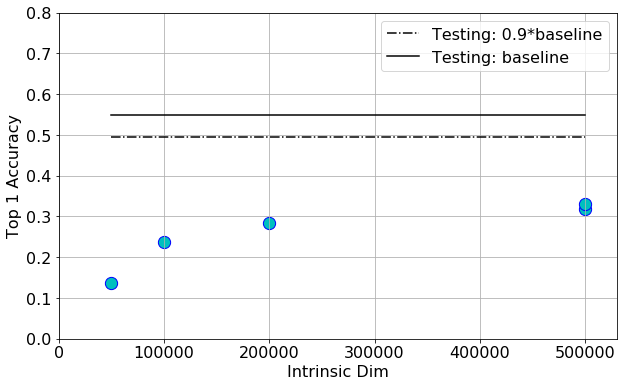

In [31]:
nn = len(Rs)-1
fig, ax = subplots(figsize=(5,4) )
  
   
plt.scatter(dim[1:], Rs[1:], edgecolor="b", facecolor="c",s=150 )
ax.plot(dim[1:], Rs[0]*np.ones(nn)*0.9,'k-.', label="Testing: 0.9*baseline")
ax.plot(dim[1:], Rs[0]*np.ones(nn),'k-', label="Testing: baseline")
ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Top 1 Accuracy')
plt.grid()
ax.legend()
ax.set_ylim([-0.0,0.8])
ax.set_xlim([0,530000])
fig.set_size_inches(10, 6)